# Python Pandas instructions

One of the most popular data science libraries is Pandas. Developed by data scientists familiar with R and Python, it has grown to support a large community of scientists and analysts. It has many built-in features, such as the ability to read data from many sources, create large dataframes (or matrixes / tables) from these sources and compute aggregate analytics based on what questions you’d like to answer. It has some built-in visualizations which can be used to chart and graph your results as well as several export functions to turn your completed analysis into an Excel Spreadsheet.

## Read data from CSV file and take a look

We create a pandas DataFrame by reading in a csv-file with the average global temperature for the years 1850 to 2016. If we look at the head of this DataFrame the notebook will render it as a nice-looking table.

In [10]:
# Importing the pandas module
import pandas as pd

# Read the data of the temperature anomaly (difference) 
# from reference period of 1961–1990 from a csv file to Pandas DataFrame
global_temp = pd.read_csv('./datasets/global_temperature.csv')

#Take a look at the first datapoints
global_temp.head()

,year,difference_temp
0,1850,-0.402
1,1851,-0.315
2,1852,-0.345
3,1853,-0.368
4,1854,-0.321


## Display plots inline 

Magic commands start with either % or %% and the command we need to nicely display plots inline is %matplotlib inline. With this magic in place, all plots created in code cells will automatically be displayed inline. 

Text(0,0.5,u'Difference Temperature')

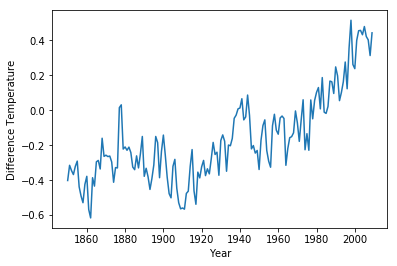

In [11]:
# Setting up inline plotting using jupyter notebook "magic"
%matplotlib inline

import matplotlib.pyplot as plt

# Plotting global temperature by year
plt.plot(global_temp['year'], global_temp['difference_temp'])

# Add some nice labels
plt.xlabel('Year')
plt.ylabel('Difference Temperature')

## Interactive map

Jupyter notebooks can render many more types of outputs such as sound, animation, video, etc. Yes, almost anything that can be shown in a modern web browser. This also makes it possible to include interactive widgets directly in the notebook!

For example, this (slightly complicated) code will create an interactive map showing the locations of the three largest smartphone companies in 2016. You can move and zoom the map, and you can click the markers for more info! 

In [4]:
# Making a map using the folium module
import folium
phone_map = folium.Map()

# Top three smart phone compagnies by market share in 2016
companies = [
    {'loc': [37.4970,  127.0266], 'label': 'Samsung: 50%'},
    {'loc': [37.3318, -122.0311], 'label': 'Apple: 40%'},
    {'loc': [22.5431, 114.0578], 'label': 'Huawei: 10%'}]

# Adding marker to the map
for company in companies:
    marker = folium.Marker(location=company['loc'], popup=company['label'])
    marker.add_to(phone_map)
    
# The last object in the cell always get shown in the notebook
phone_map

Reference: https://projects.datacamp.com/projects/33

# Throwback 1: The beginning

The data frame as a way to store data in rectangular grids that can easily be overviewed. A data frame’s rows do not need to contain, but can contain, the same type of values: they can be numeric, character, logical, etc.

In general, you could say that the Pandas data frame consists of three main components: the data, the index, and the columns.

1. Firstly, the DataFrame can contain data that is:
    - a Pandas DataFrame: a 2-D labeled array
    - a Pandas Series: a 1-D labeled array capable of holding any data type with axis labels or index. An example of a Series object is one column from a DataFrame.
    - a Numpy ndarray, which can be a record or structured:
        - structured array: manipulate the data by named fields
        - record array: access fields of structured arrays by attribute rather than by index (expand the properties of structured arrays)
    - a two-dimensional ndarray
    - dictionaries of one-dimensional ndarrays, lists, dictionaries or Series.



In [3]:
import numpy as np
import pandas as pd

# Example of a structured array
structured_array = np.ones(3, dtype=([('foo', int), ('bar', float)]))
print(structured_array)
print(structured_array['foo'])

# Example of a record array
record_array = structured_array.view(np.recarray)
print(record_array)
print(record_array.foo)

[(1,  1.) (1,  1.) (1,  1.)]
[1 1 1]
[(1,  1.) (1,  1.) (1,  1.)]
[1 1 1]


2.Secondly, a DataFrame needs to be specified the index and column names. The index, on the one hand, indicates the difference in rows, while the column names indicate the difference in columns.



### Create a Pandas DataFrame

To make a data frame from a NumPy array, you can just pass it to the DataFrame() function in the data argument.

In [4]:
# Create an 2D numpy array
data = np.array([
    ['', 'Col1', 'Col2'],
    ['Row1', 1, 2],
    ['Row2', 3, 4]
])

# Make a DataFrame from this array
print(pd.DataFrame(data = data[1:,1:],
                  index = data[1:,0],
                  columns = data[0,1:]))

     Col1 Col2
Row1    1    2
Row2    3    4


In [5]:
# Create a DataFrame directly
df = pd.DataFrame(data=[4,5,6,7], index=range(0,4), columns=['A'])
print(df)

# Create a Serie from two arrays as data and index
series_1 = pd.Series(data=['Brussels', 'New Delhi', 'London','Washington'], index=['Belgium', 'India', 'United Kingdom', 'United States'])
print(series_1)

# Create a Serie from a dictionary
series_2 = pd.Series({"Belgium":"Brussels", "India":"New Delhi", "United Kingdom":"London", "United States":"Washington"})

# Get the information about the height of Series
print('Height of the serie: %d' %len(series_2))

   A
0  4
1  5
2  6
3  7
Belgium             Brussels
India              New Delhi
United Kingdom        London
United States     Washington
dtype: object
Height of the serie: 4


You can use the "shape" property or the "len()" function in combination with the .index property:

In [6]:
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]))
print(df)

# Get the dimensions of the DataFrame
print('Shape of the dataframe', df.shape)

# Get the information on the height
# len() used only for Series => need the property .index
print('Height of dataframe', len(df.index))

# Get the information on the height
# df[0].count() will exclude the NaN value => not the better option
print('Height of dataframe', df[0].count())

# Get the value of DataFrame columns/index
# Keep as nparray
print('Values of index', df.index.values)
# Or convert to list
print('Values of columns', list(df.columns.values))

   0  1  2
0  1  2  3
1  4  5  6
('Shape of the dataframe', (2, 3))
('Height of dataframe', 2)
('Height of dataframe', 2)
('Values of index', array([0, 1]))
('Values of columns', [0, 1, 2])


### Fundamental DataFrame Operations

#### How To Select an Index or Column From a Pandas DataFrame?

- Selecting a value in DataFrame:
       - loc[label of index] works on labels of your index
       - iloc[position of index] works on the positions in your index
       - ix[label of index] = loc[] if index is integer-based
         ix[position of index] = iloc[] if index is not integer-based  

In [15]:
# DataFrame with integer-based index
df = pd.DataFrame(data=[[1,2,3], [4,5,6], [7,8,9]], columns=['A','B','C'])
print(df)

# Access the value that is at index 0, in column 'A'
# the most important ones
# using .iloc[number of index][number of column] or loc[number of index][label of column]
print(df.iloc[0][0])
print(df.loc[0]['A'])

print(df.at[0,'A'])
print(df.iat[0,0])

# Removed in future release
print(df.get_value(0, 'A'))

# DataFrame with non-integer-based index
df_2 = pd.DataFrame(data=np.array([[1,2,3],[4,5,6],[7,8,9]]), index=[2,'A',4], columns=[48,49,50])
print(df_2)

# Select values at index label = 2
print(df_2.loc[2])

# Select values at index position = 2 (label = 4)
print(df_2.iloc[2])

# Select values at index position = 2 (due to index is not integer-based)
print(df_2.ix[2])

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9
1
1
1
1
1
   48  49  50
2   1   2   3
A   4   5   6
4   7   8   9
48    1
49    2
50    3
Name: 2, dtype: int64
48    7
49    8
50    9
Name: 4, dtype: int64
48    7
49    8
50    9
Name: 4, dtype: int64


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


- Selecting rows and columns

In [9]:
# Use iloc[number of index] to select row 0
# similar to iloc[0,:]
print(df.iloc[0])

# Use loc[label of column] to select column 'A'
# loc[:,'A']
print(df.loc[:,'A'])

A    1
B    2
C    3
Name: 0, dtype: int64
0    1
1    4
2    7
Name: A, dtype: int64


#### How To Add an Index, Row or Column to a Pandas DataFrame?

- Adding an Index to a DataFrame: 
        - Default: when you don’t specify the input to the ‘index’ argument , your DataFrame will have, by default, a numerically valued index that starts with 0 and continues until the last row of your DataFrame.
        - Custom: re-use one of your columns and make it your index by .set_index()

In [10]:
print(df)

# Replace the default index [0,1,2] by the values of column 'C': [3,6,9]
print(df.set_index('C'))

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9
   A  B
C      
3  1  2
6  4  5
9  7  8


- Adding Rows/Column to a DataFrame

In [59]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), index= [2.5, 12.6, 4.8], columns=[48, 49, 50])
print(df)

# Add a new row with index label = 2, value = [11,12,13] 
df.loc[2] = [11,12,13]
print(df)

# Add a new column with column label = 51, value = [14,15,16,17]
df.loc[:,51] = [14,15,16,17]
print(df)

# Add Series as a new column with 
df.loc[:, 52] = pd.Series([18,19,20,21], index=df.index)
print(df)

# Add a new column with column label = 53, values = index values = [2.5, 12.6, 4.8, 2.0]
df[53] = df.index
print(df)

      48  49  50
2.5    1   2   3
12.6   4   5   6
4.8    7   8   9
      48  49  50
2.5    1   2   3
12.6   4   5   6
4.8    7   8   9
2.0   11  12  13
      48  49  50  51
2.5    1   2   3  14
12.6   4   5   6  15
4.8    7   8   9  16
2.0   11  12  13  17
      48  49  50  51  52
2.5    1   2   3  14  18
12.6   4   5   6  15  19
4.8    7   8   9  16  20
2.0   11  12  13  17  21
      48  49  50  51  52    53
2.5    1   2   3  14  18   2.5
12.6   4   5   6  15  19  12.6
4.8    7   8   9  16  20   4.8
2.0   11  12  13  17  21   2.0


- Resetting the Index of Your DataFrame

In [62]:
print(df)

# Reset index to defaut, remove the old index
print(df.reset_index(level=0, drop=True))

      48  49  50  51  52    53
2.5    1   2   3  14  18   2.5
12.6   4   5   6  15  19  12.6
4.8    7   8   9  16  20   4.8
2.0   11  12  13  17  21   2.0
   48  49  50  51  52    53
0   1   2   3  14  18   2.5
1   4   5   6  15  19  12.6
2   7   8   9  16  20   4.8
3  11  12  13  17  21   2.0


#### How to Delete Indices, Rows or Columns From a Pandas Data Frame

- Deleting an Index from Your DataFrame

In [154]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [40, 50, 60], [23, 35, 37]]), 
                  index= [2.5, 12.6, 4.8, 4.8, 2.5], 
                  columns=[48, 49, 50])
print(df)

# Want to avoid the duplicate index
# Reset index to default => drop the duplicates of 'index' column, keep the last values => set column 'index' as index
print(df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index'))

      48  49  50
2.5    1   2   3
12.6   4   5   6
4.8    7   8   9
4.8   40  50  60
2.5   23  35  37
       48  49  50
index            
12.6    4   5   6
4.8    40  50  60
2.5    23  35  37


- Deleting a Column from Your DataFrame

In [159]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [40, 50, 60], [23, 35, 37]]), 
                  index= [2.5, 12.6, 4.8, 4.8, 2.5], 
                  columns=[48, 49, 50])
print(df)

# Drop column (axis=1) label 50
# inplace=True: delete the column without reassigning the DataFrame
df.drop(50, axis=1, inplace=True)
print(df)

# Drop column (axis=1) at position 1
df.drop(df.columns[[1]], axis=1)
print(df)


# Drop row (axis=0) label 2.5
df.drop(2.5, axis=0, inplace=True)
print(df)

      48  49  50
2.5    1   2   3
12.6   4   5   6
4.8    7   8   9
4.8   40  50  60
2.5   23  35  37
      48  49
2.5    1   2
12.6   4   5
4.8    7   8
4.8   40  50
2.5   23  35
      48  49
2.5    1   2
12.6   4   5
4.8    7   8
4.8   40  50
2.5   23  35
      48  49
12.6   4   5
4.8    7   8
4.8   40  50


- Removing a Row from Your DataFrame

In [160]:
# Drop the row at index position 0
print(df.drop(df.index[0]))

     48  49
4.8   7   8
4.8  40  50


#### How to Rename the Index or Columns of a Pandas DataFrame

In [167]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [40, 50, 60], [23, 35, 37]]), 
                  index= [2.5, 12.6, 4.8, 4.8, 2.5], 
                  columns=[48, 49, 50])
print(df)

newcols = {48: '48_new', 49: '49_new', 50: '50_new'}
newrows = {4.8: '4.8_new'}
# Rename columns 
df.rename(columns=newcols, inplace=True)
print(df)

# Rename rows
df.rename(index=newrows, inplace=True)
print(df)

      48  49  50
2.5    1   2   3
12.6   4   5   6
4.8    7   8   9
4.8   40  50  60
2.5   23  35  37
      48_new  49_new  50_new
2.5        1       2       3
12.6       4       5       6
4.8        7       8       9
4.8       40      50      60
2.5       23      35      37
         48_new  49_new  50_new
2.5           1       2       3
12.6          4       5       6
4.8_new       7       8       9
4.8_new      40      50      60
2.5          23      35      37


####  How To Format The Data in Your Pandas DataFrame

- Replacing All Occurrences of a String in a DataFrame

In [39]:
import pandas as pd
df = pd.DataFrame(data=[['OK', 'Perfect', 'Acceptable'],
                        ['Awful', 'Awful', 'Perfect'],
                        ['Acceptable', 'OK', 'Poor']],
                 columns=['Student1', 'Student2', 'Student3'])
print(df)

# Replace the strings by numerical values (0-4)
print(df.replace(['Awful', 'Poor', 'OK', 'Acceptable', 'Perfect'], [0, 1, 2, 3, 4]))

df = pd.DataFrame(data=[['OK\n', 'Perfect', 'Acceptable'],
                        ['Awful\n', 'Awful', 'Perfect'],
                        ['Acceptable', 'OK', 'Poor']],
                 columns=['Student1', 'Student2', 'Student3'])

# Replace the string combinations using regex
print(df.replace({'\n': '<br>'}, regex=True))

     Student1 Student2    Student3
0          OK  Perfect  Acceptable
1       Awful    Awful     Perfect
2  Acceptable       OK        Poor
   Student1  Student2  Student3
0         2         4         3
1         0         0         4
2         3         2         1
     Student1 Student2    Student3
0      OK<br>  Perfect  Acceptable
1   Awful<br>    Awful     Perfect
2  Acceptable       OK        Poor


- Removing Parts From Strings in the Cells of Your DataFrame

In [40]:
# Delete unwanted parts from the strings in the `Student1` column
# lstrip(): Remove '\n' from the left of string
# rstrip(): Remove '\n' from the right of string
# map(): Apply the lambda function over each element or element-wise of the column
df['Student1'] = df['Student1'].map(lambda x: x.lstrip('\n').rstrip('\n'))
print(df)

     Student1 Student2    Student3
0          OK  Perfect  Acceptable
1       Awful    Awful     Perfect
2  Acceptable       OK        Poor


- Splitting Text in a Column into Multiple Rows in a DataFrame

In [106]:
df = pd.DataFrame({'Age': [34,22,19], 'PlusOne': [0,0,1], 'Ticket': ['22:33:44', '55:66:77', '45:56:67 56:78:90']})
print(df)

# str.split(): Split out the two values in the third row
# apply(pd.Series, 1): Make it a Series, axis=1
# stack(): Stack the values
ticket_series = df['Ticket'].str.split(' ').apply(pd.Series, 1).stack()

# Get rid of the stack:
# droplevel(-1): Drop the level to line up with the DataFrame
# 0-indexed beginning from the top
ticket_series.index = ticket_series.index.droplevel(-1)

# Make your series a dataframe 
ticketdf = pd.DataFrame(ticket_series)
print(ticketdf)

# Delete the `Ticket` column from your DataFrame
del df['Ticket']

# Join the ticket DataFrame to `df`
df = df.join(ticketdf)

# Check out the new `df`
df

   Age  PlusOne             Ticket
0   34        0           22:33:44
1   22        0           55:66:77
2   19        1  45:56:67 56:78:90
          0
0  22:33:44
1  55:66:77
2  45:56:67
2  56:78:90


,Age,PlusOne,0
0,34,0,22:33:44
1,22,0,55:66:77
2,19,1,45:56:67
2,19,1,56:78:90


- Applying A Function to Your Pandas DataFrame’s Columns or Rows

In [107]:
doubler = lambda x: x*2
# Apply a function to column
print(df['Age'].apply(doubler))
# Using map() instead of doubler
print(df['Age'].map(lambda x: x*2))
# Using applymap() instead of map()
print(df.applymap(doubler))

# Apply a function to row
print(df.loc[0].apply(doubler))


0    68
1    44
2    38
2    38
Name: Age, dtype: int64
0    68
1    44
2    38
2    38
Name: Age, dtype: int64
   Age  PlusOne                 0
0   68        0  22:33:4422:33:44
1   44        0  55:66:7755:66:77
2   38        2  45:56:6745:56:67
2   38        2  56:78:9056:78:90
Age                      68
PlusOne                   0
0          22:33:4422:33:44
Name: 0, dtype: object


#### How To Create an Empty DataFrame

In [108]:
import numpy as np

# np.nan: create a dataframe with values=nan
df = pd.DataFrame(np.nan, index=[0,1,2,3], columns=['A'])
print(df)

# dtype: specific the type of values
df = pd.DataFrame(index=range(0,4), columns=['A'], dtype='float')
print(df)

# DataFrame with no specified index
df = pd.DataFrame(columns=['A'], dtype='float')
# Index will be defaulty added when adding values
df.loc[0] = 1
print(df)

    A
0 NaN
1 NaN
2 NaN
3 NaN
    A
0 NaN
1 NaN
2 NaN
3 NaN
     A
0  1.0


####  Does Pandas Recognize Dates When Importing Data?

Pandas can recognize it, but you need to help it a tiny bit: add the argument parse_dates when you’reading in data from, let’s say, a comma-separated value (CSV) file. There are, however, always weird date-time formats.

In [95]:
import pandas as pd
df = pd.read_csv('./datasets/weather.csv', parse_dates=True)
print(df.head())

# Or another way to take a column as datas
pd.read_csv('./datasets/weather.csv', parse_dates=['DATE']).head()

             STATION          STATION_NAME  ELEVATION  LATITUDE  LONGITUDE  \
0  GHCND:USC00327027  PETERSBURG 2 N ND US      466.3   48.0355     -98.01   
1  GHCND:USC00327027  PETERSBURG 2 N ND US      466.3   48.0355     -98.01   
2  GHCND:USC00327027  PETERSBURG 2 N ND US      466.3   48.0355     -98.01   
3  GHCND:USC00327027  PETERSBURG 2 N ND US      466.3   48.0355     -98.01   
4  GHCND:USC00327027  PETERSBURG 2 N ND US      466.3   48.0355     -98.01   

       DATE  TMAX  TMIN  PRCP  
0  20100101  -178  -311     0  
1  20100102  -244  -322     0  
2  20100103  -194  -289     0  
3  20100104  -167  -200    15  
4  20100105  -133  -167  9999  


,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,TMAX,TMIN,PRCP
0,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-01-01,-178,-311,0
1,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-01-02,-244,-322,0
2,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-01-03,-194,-289,0
3,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-01-04,-167,-200,15
4,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-01-05,-133,-167,9999


In such cases, you can construct your own parser to deal with this.

In [109]:
dateparser = lambda x: pd.datetime.strptime(x, '%Y%m%d')

# Which makes your read command:
pd.read_csv('./datasets/weather.csv', parse_dates=['DATE'], date_parser=dateparser).head()

# Or combine two columns into a single DateTime column
# pd.read_csv('./datasets/weather.csv', parse_dates={'datetime': ['date', 'time']}, date_parser=dateparser)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,TMAX,TMIN,PRCP
0,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-01-01,-178,-311,0
1,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-01-02,-244,-322,0
2,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-01-03,-194,-289,0
3,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-01-04,-167,-200,15
4,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-01-05,-133,-167,9999


####  When, Why And How You Should Reshape Your Pandas DataFrame

Reshaping your DataFrame is basically transforming it so that the resulting structure makes it more suitable for your data analysis.

There are three ways of reshaping that frequently raise questions with users: pivoting, stacking and unstacking and melting.

- Pivotting Your DataFrame

You can use the pivot() function to create a new derived table out of your original one. When you use the function, you can pass three arguments:

    Values: this argument allows you to specify which values of your original DataFrame you want to see in your pivot table.
    Columns: whatever you pass to this argument will become a column in your resulting table.
    Index: whatever you pass to this argument will become an index in your resulting table.

In [112]:
products = pd.DataFrame({'category': ['Cleaning', 'Cleaning', 'Entertainment', 'Entertainment', 'Tech', 'Tech'],
                        'store': ['Walmart', 'Dia', 'Walmart', 'Fnac', 'Dia','Walmart'],
                        'price':[11.42, 23.50, 19.99, 15.95, 55.75, 111.55],
                        'testscore': [4, 3, 5, 7, 5, 8]})
print(products.head())
print('\n')

# Use `pivot()` to pivot the DataFrame
pivot_products = products.pivot(index='category', columns='store', values='price')
print(pivot_products)

        category  price    store  testscore
0       Cleaning  11.42  Walmart          4
1       Cleaning  23.50      Dia          3
2  Entertainment  19.99  Walmart          5
3  Entertainment  15.95     Fnac          7
4           Tech  55.75      Dia          5


store            Dia   Fnac  Walmart
category                            
Cleaning       23.50    NaN    11.42
Entertainment    NaN  15.95    19.99
Tech           55.75    NaN   111.55


When you don’t specifically fill in what values you expect to be present in your resulting table, you will pivot by multiple columns:

In [117]:
products = pd.DataFrame({'category': ['Cleaning', 'Cleaning', 'Entertainment', 'Entertainment', 'Tech', 'Tech'],
                        'store': ['Walmart', 'Dia', 'Walmart', 'Fnac', 'Dia','Walmart'],
                        'price':[11.42, 23.50, 19.99, 15.95, 55.75, 111.55],
                        'testscore': [4, 3, 5, 7, 5, 8]})
print(products)
print('\n')

# Note that your data can not have rows with duplicate values for the columns that you specify
pivot_products = products.pivot(index='category', columns='store')
print(pivot_products)

        category   price    store  testscore
0       Cleaning   11.42  Walmart          4
1       Cleaning   23.50      Dia          3
2  Entertainment   19.99  Walmart          5
3  Entertainment   15.95     Fnac          7
4           Tech   55.75      Dia          5
5           Tech  111.55  Walmart          8


               price                testscore             
store            Dia   Fnac Walmart       Dia Fnac Walmart
category                                                  
Cleaning       23.50    NaN   11.42       3.0  NaN     4.0
Entertainment    NaN  15.95   19.99       NaN  7.0     5.0
Tech           55.75    NaN  111.55       5.0  NaN     8.0


In [122]:
products = pd.DataFrame({'category': ['Cleaning', 'Cleaning', 'Entertainment', 'Entertainment', 'Tech', 'Tech'],
                        'store': ['Walmart', 'Dia', 'Walmart', 'Fnac', 'Dia','Walmart'],
                        'price':[11.42, 23.50, 19.99, 15.95, 19.99, 111.55],
                        'testscore': [4, 3, 5, 7, 5, 8]})
print(products)
print('\n')

# aggfunc: use an aggregation function used to combine multiple values 
# only for pivot_table
pivot_products = products.pivot_table(index='category', columns='store', values='price', aggfunc='mean')
print(pivot_products)

        category   price    store  testscore
0       Cleaning   11.42  Walmart          4
1       Cleaning   23.50      Dia          3
2  Entertainment   19.99  Walmart          5
3  Entertainment   15.95     Fnac          7
4           Tech   19.99      Dia          5
5           Tech  111.55  Walmart          8


store            Dia   Fnac  Walmart
category                            
Cleaning       23.50    NaN    11.42
Entertainment    NaN  15.95    19.99
Tech           19.99    NaN   111.55


- Using stack() and unstack() to Reshape Your Pandas DataFrame

When you stack a DataFrame, you make it taller. You move the innermost column index to become the innermost row index. You return a DataFrame with an index with a new inner-most level of row labels.

Unstack() to move the innermost row index to become the innermost column index.

- Reshaping Your DataFrame With Melt()

Melting is considered to be very useful for when you have a data that has one or more columns that are identifier variables, while all other columns are considered measured variables. DataFrame will now become longer instead of wider.

As a result, you just have two non-identifier columns, namely, ‘variable’ and ‘value’.

In [127]:
# The `people` DataFrame
people = pd.DataFrame({'FirstName' : ['John', 'Jane'],
                       'LastName' : ['Doe', 'Austen'],
                       'BloodType' : ['A-', 'B+'],
                       'Weight' : [90, 64]})
print(people)
print('\n')

# Use `melt()` on the `people` DataFrame
print(pd.melt(people, id_vars=['FirstName', 'LastName'], var_name='measurements'))

  BloodType FirstName LastName  Weight
0        A-      John      Doe      90
1        B+      Jane   Austen      64


  FirstName LastName measurements value
0      John      Doe    BloodType    A-
1      Jane   Austen    BloodType    B+
2      John      Doe       Weight    90
3      Jane   Austen       Weight    64


#### How To Iterate Over a Pandas DataFrame

You can iterate over the rows of your DataFrame with the help of a for loop in combination with an iterrows() call on your DataFrame:

In [129]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
print(df)

for index, row in df.iterrows() :
    print(row['A'], row['B'])

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9
(1, 2)
(4, 5)
(7, 8)


#### How To Write a Pandas DataFrame to a File

- Outputting a DataFrame to CSV

In [132]:
df.to_csv('./datasets/myDataFrame.csv', sep=',', encoding='utf-8')

- Writing a DataFrame to Excel

In [135]:
writer = pd.ExcelWriter('./datasets/myDataFrame.xlsx')
df.to_excel(writer, 'DataFrame')
writer.save()